## Thyroid Disease

### Project Goal

this dataset is about thyroid diseases and cancer.There are medical information of 383 patents collected and 17 fetures including; age,gender,smoking,Hx smoking,Hx Radiotherapy, Thyroid Function, Physical Examination, Adenopathy, Pathology, focality, risk, T(Tumor classification), N(Nodal classification), M(Metastasis classification), stage, Response, Recurred
that in this project we want to train a model to determine that recurred the disease again in pateint or not.
and it train another model for determine responseing to treatment.

### Model Training

After exploratory data analysis (EDA), we aim to train two models for the following tasks:
1. Predict if the disease will recur after treatment (Recurred)
2. Predict the patient's response to treatment (Response)

We use Decision Tree classifiers for both tasks.


### introduction feature

Age: The age of the patient at the time of diagnosis or treatment.

Gender: The gender of the patient (male or female).

Smoking: Whether the patient is a smoker or not.

Hx Smoking: Smoking history of the patient (e.g., whether they have ever smoked).

Hx Radiotherapy: History of radiotherapy treatment for any condition.

Thyroid Function: The status of thyroid function, possibly indicating if there are any abnormalities.

Physical Examination: Findings from a physical examination of the patient, which may include palpation of the thyroid gland and 
surrounding structures.

Adenopathy: Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.

Pathology: Specific types of thyroid cancer as determined by pathology examination of biopsy samples.

Focality: Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).

Risk: The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.

T: Tumor classification based on its size and extent of invasion into nearby structures.

N: Nodal classification indicating the involvement of lymph nodes.

M: Metastasis classification indicating the presence or absence of distant metastases.

Stage: The overall stage of the cancer, typically determined by combining T, N, and M classifications.

Response: Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.

Recurred: Indicates whether the cancer has recurred after initial treatment.

### Importing library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Importing Dataset

In [4]:
dft = pd.read_csv('Thyroid_Diff.csv')

In [5]:
dft.shape

(383, 17)

In [6]:
pd.set_option('display.max_rows',None)
dft.head(400)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
5,52,M,Yes,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No
6,41,F,No,Yes,No,Clinical Hyperthyroidism,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
7,46,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
8,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
9,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


### Data Cleaning & Preprocessing

In [7]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [8]:
for i in dft.columns:
    print(dft[i].unique())

[27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]
['F' 'M']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']
['Uni-Focal' 'Multi-Focal']
['Low' 'Intermediate' 'High']
['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']
['N0' 'N1b' 'N1a']
['M0' 'M1']
['I' 'II' 'IVB' 'III' 'IVA']
['Indeterminate' 'Excellent' 'Structural Incomplete'
 'Biochemical Incomplete']
['No' 'Yes']


In [9]:
dft.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [10]:
dft.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [11]:
dft.describe(include='object').T

,count,unique,top,freq
Gender,383,2,F,312
Smoking,383,2,No,334
Hx Smoking,383,2,No,355
Hx Radiothreapy,383,2,No,376
Thyroid Function,383,5,Euthyroid,332
Physical Examination,383,5,Multinodular goiter,140
Adenopathy,383,6,No,277
Pathology,383,4,Papillary,287
Focality,383,2,Uni-Focal,247
Risk,383,3,Low,249


In [12]:
dft['Response'].value_counts()

Response
Excellent                 208
Structural Incomplete      91
Indeterminate              61
Biochemical Incomplete     23
Name: count, dtype: int64

In [13]:
dft['Recurred'].value_counts()

Recurred
No     275
Yes    108
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Age'>

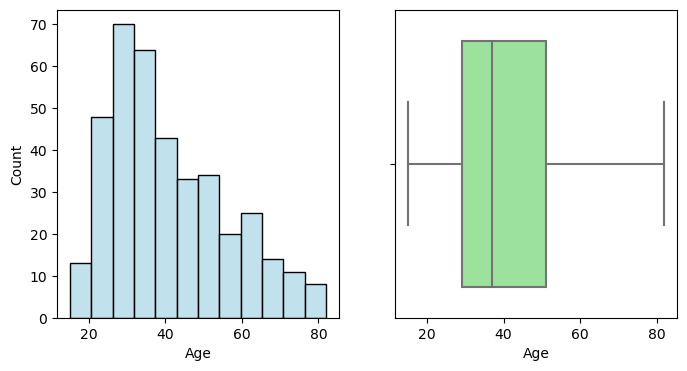

In [15]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(x='Age',data=dft,color='lightblue')

plt.subplot(1,2,2)
sns.boxplot(x='Age', data=dft , color='lightgreen')

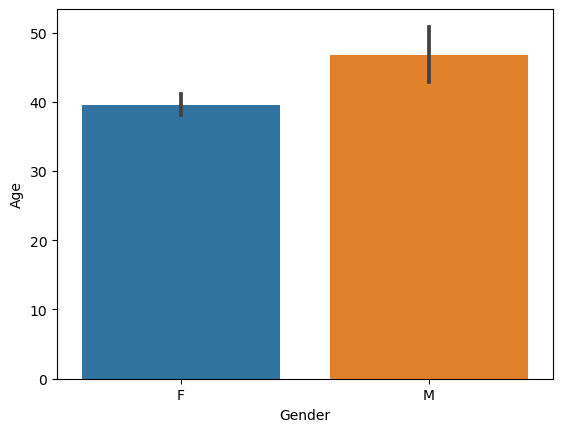

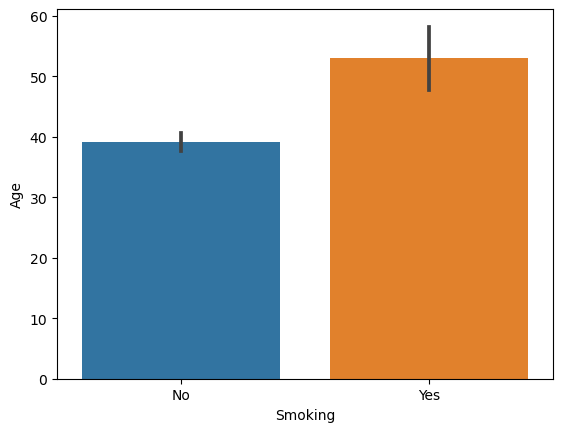

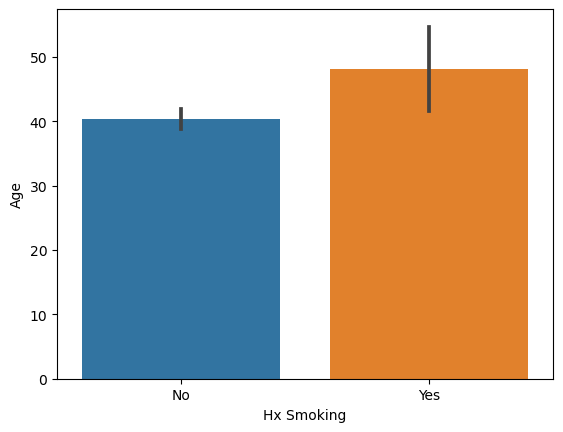

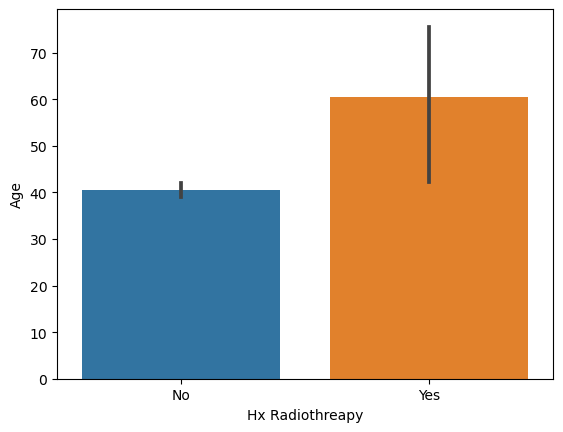

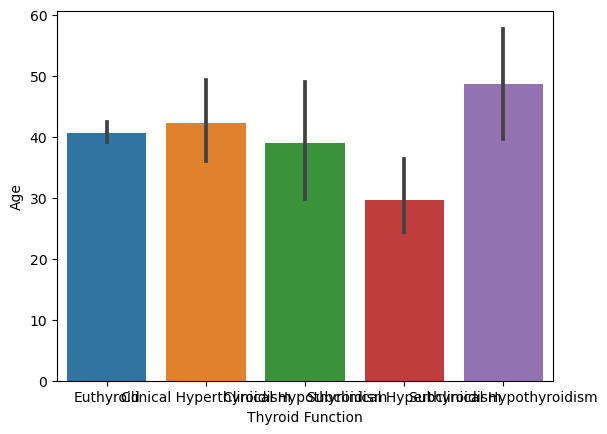

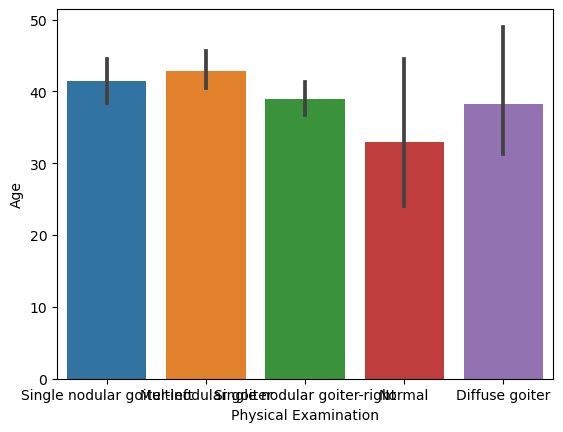

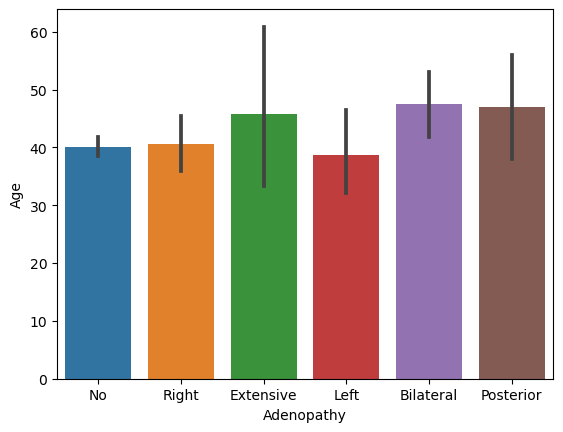

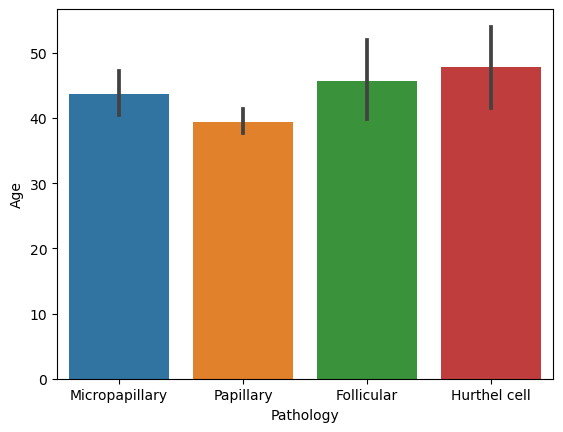

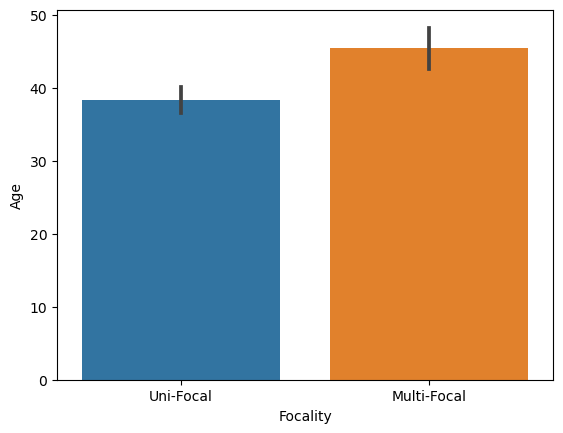

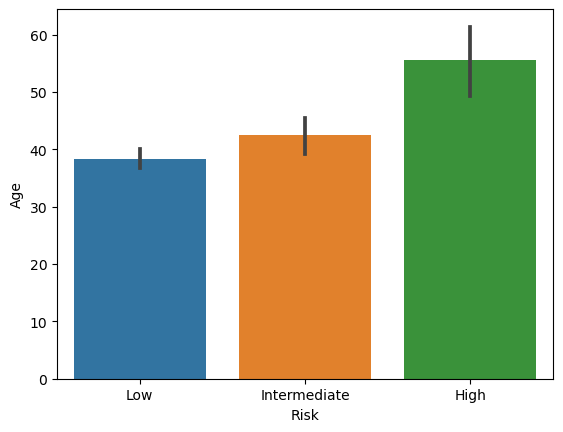

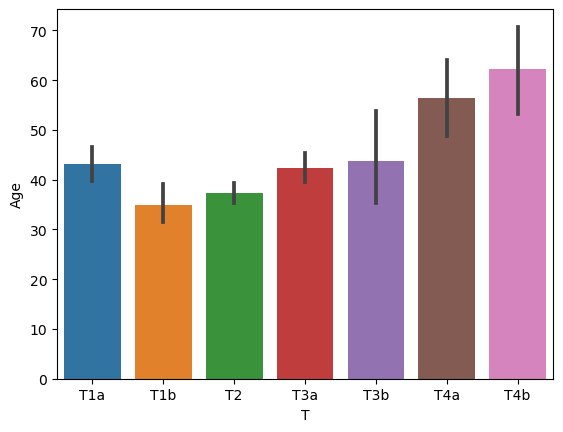

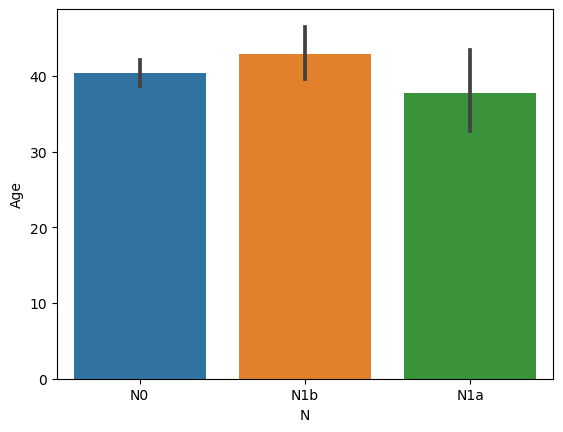

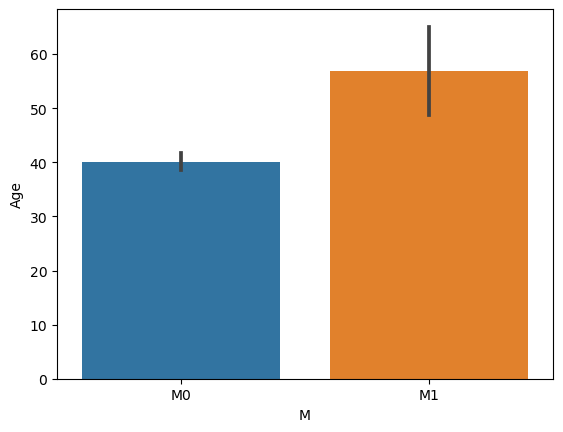

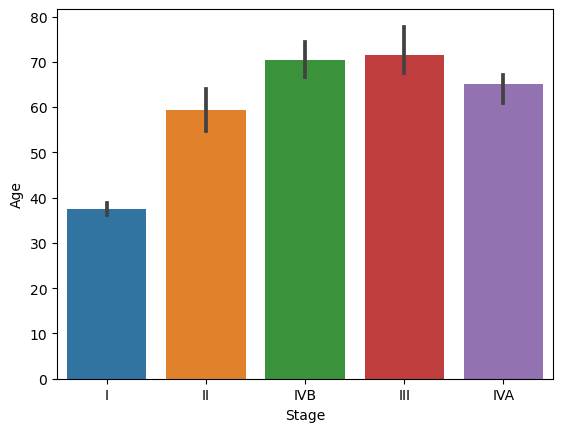

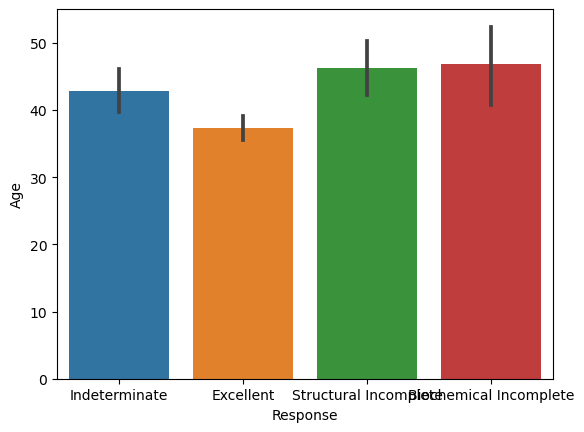

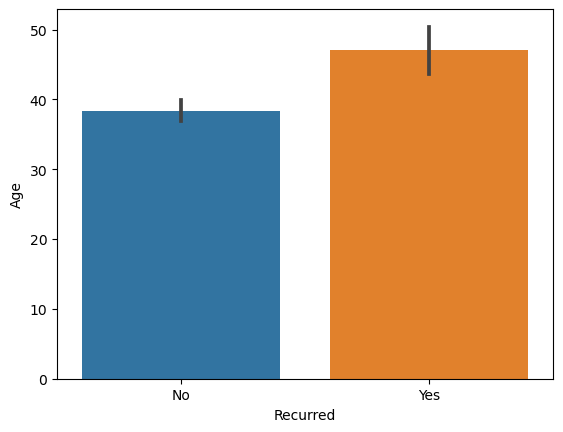

In [16]:
for col in dft.select_dtypes(include='object').columns:
    sns.barplot(x=col , y='Age', data=dft)
    plt.show()

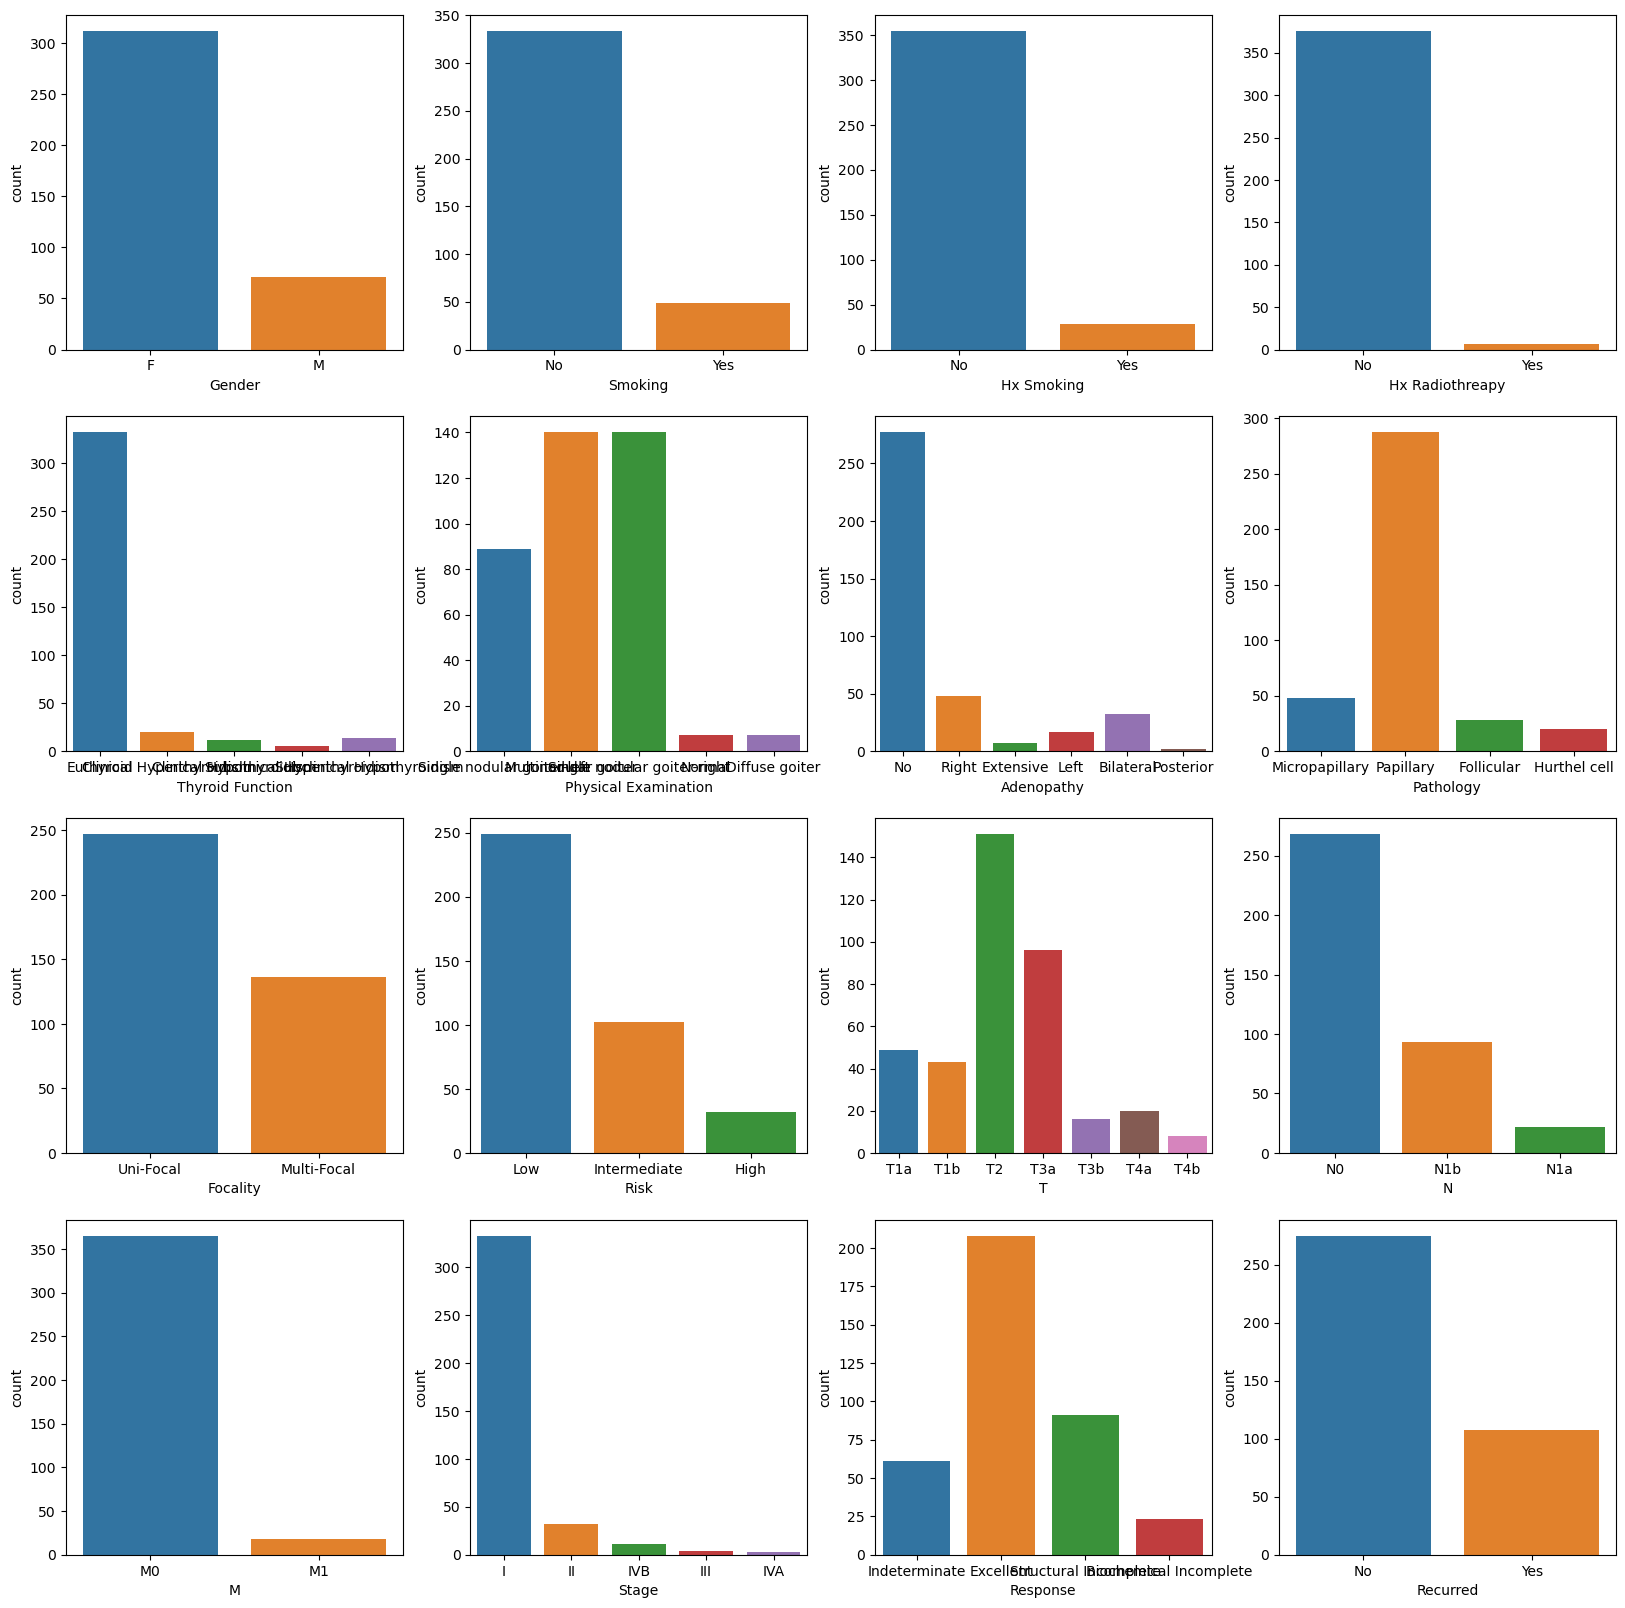

In [17]:
fig ,ax=plt.subplots(ncols=4 ,nrows=4, figsize=(20,20))
index=0
ax = ax.flatten()

for col in dft.select_dtypes(include='object').columns:
    sns.countplot(x=col , data=dft ,ax=ax[index])
    index+=1
    

In [18]:
#transform object data to number
le=LabelEncoder()
for c in dft.select_dtypes('object').columns:
    dft[c]=le.fit_transform(dft[c])

In [19]:
dft

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0
5,52,1,1,0,0,2,1,3,2,0,2,0,0,0,0,2,0
6,41,0,0,1,0,0,4,3,2,1,2,0,0,0,0,1,0
7,46,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
8,51,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
9,40,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0


In [20]:
df1=dft.drop(['M','Hx Radiothreapy'], axis=1)

In [21]:
df1

,Age,Gender,Smoking,Hx Smoking,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,Stage,Response,Recurred
0,27,0,0,0,2,3,3,2,1,2,0,0,0,2,0
1,34,0,0,1,2,1,3,2,1,2,0,0,0,1,0
2,30,0,0,0,2,4,3,2,1,2,0,0,0,1,0
3,62,0,0,0,2,4,3,2,1,2,0,0,0,1,0
4,62,0,0,0,2,1,3,2,0,2,0,0,0,1,0
5,52,1,1,0,2,1,3,2,0,2,0,0,0,2,0
6,41,0,0,1,0,4,3,2,1,2,0,0,0,1,0
7,46,0,0,0,2,4,3,2,1,2,0,0,0,1,0
8,51,0,0,0,2,4,3,2,1,2,0,0,0,1,0
9,40,0,0,0,2,4,3,2,1,2,0,0,0,1,0


##### we want to train two models for detection two problem: 1- Recurreing this disease after treatment     2- Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.

### project 1: Recurreing

In [22]:
#determine X and y
X = df1.iloc[:,:14]
y = df1['Recurred']

### Splitting Data into Train and Test

In [23]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train , y_test = train_test_split(X , y , test_size= 0.2 , stratify= y ,random_state= 12 )

In [24]:
#model1 : Criterion: 'gini' ==>difult
from sklearn.tree import DecisionTreeClassifier
dt11=DecisionTreeClassifier(max_depth = 5)
dt11.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [25]:
y_pred11=dt11.predict(X_test)
dt11.score(X_test , y_test)

0.961038961038961

In [26]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [27]:
print(classification_report(y_test , y_pred11))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        55
           1       0.91      0.95      0.93        22

    accuracy                           0.96        77
   macro avg       0.95      0.96      0.95        77
weighted avg       0.96      0.96      0.96        77



In [28]:
confusion_matrix(y_test , y_pred11)

array([[53,  2],
       [ 1, 21]], dtype=int64)

<Axes: >

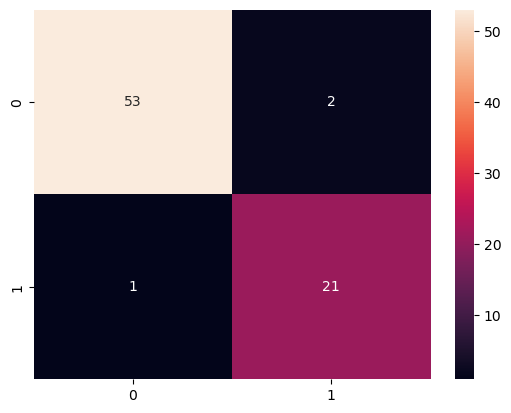

In [29]:
sns.heatmap(confusion_matrix(y_test , y_pred11) ,annot=True)

In [30]:
accuracy_score(y_test , y_pred11)

0.961038961038961

In [31]:
#model2 : Criterion :  “entropy”
dt12=DecisionTreeClassifier(criterion='entropy')
dt12.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy')

In [32]:
y_pred12= dt12.predict(X_test)
dt12.score(X_test , y_test)

0.961038961038961

In [33]:
print(classification_report(y_test , y_pred12))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.95      0.91      0.93        22

    accuracy                           0.96        77
   macro avg       0.96      0.95      0.95        77
weighted avg       0.96      0.96      0.96        77



In [34]:
print(confusion_matrix(y_test , y_pred12))

[[54  1]
 [ 2 20]]


<Axes: >

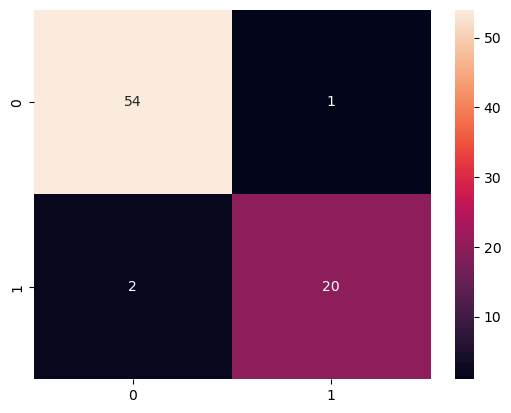

In [35]:
sns.heatmap(confusion_matrix(y_test , y_pred12) , annot= True)

In [36]:
accuracy_score(y_test , y_pred12)

0.961038961038961

### Project 2: Response Detection


In [37]:
df21=dft.drop(['Hx Radiothreapy'], axis=1)
df21

,Age,Gender,Smoking,Hx Smoking,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0
5,52,1,1,0,2,1,3,2,0,2,0,0,0,0,2,0
6,41,0,0,1,0,4,3,2,1,2,0,0,0,0,1,0
7,46,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
8,51,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
9,40,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0


In [38]:
#spliting X ,y
X = df21.drop(['Response'], axis=1)
y = df21['Response']

In [39]:
X_train ,X_test ,y_train ,y_test = train_test_split(X, y, test_size=0.2 ,stratify=y)

In [40]:
dt21=DecisionTreeClassifier()
dt21.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
y_pred21=dt21.predict(X_test)
dt21.score(X_test ,y_test)

0.7012987012987013

In [42]:
print(classification_report(y_test , y_pred21))

              precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       0.76      0.81      0.78        42
           2       0.20      0.17      0.18        12
           3       0.94      0.89      0.91        18

    accuracy                           0.70        77
   macro avg       0.57      0.57      0.57        77
weighted avg       0.69      0.70      0.69        77



In [43]:
print(confusion_matrix(y_test, y_pred21))

[[ 2  0  2  1]
 [ 2 34  6  0]
 [ 0 10  2  0]
 [ 1  1  0 16]]


<Axes: >

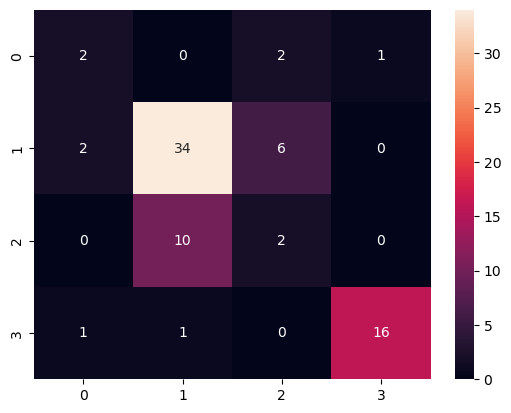

In [44]:
sns.heatmap(confusion_matrix(y_test, y_pred21), annot=True)

In [45]:
accuracy_score(y_test, y_pred21)

0.7012987012987013

In [46]:
#model2: criterion='entropy'
dt22=DecisionTreeClassifier(criterion='entropy')
dt22.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy')

In [47]:
y_pred22=dt22.predict(X_test)
dt22.score(X_test , y_test)

0.7012987012987013